# COMP 4211 Project

 this is the comp4211 (Spring 2019) project implemented by CHEN,Yifei and LI,Siqi
 Our project has two major parts: 
 1. Developing model of decision trees to determine the sentiment (positive or negative for the input review)
 2. Construct the model to predict the rating for an App

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# 1. Data preprocessing
As for the original dataset, lots of elements are flawed or unsuitable for further analysis. Therefore, 
we need to do some data clean and preprocessing

In [2]:
# For Reviews Dataset
# Reading data from CSV
review_data = pd.read_csv('googleplaystore_user_reviews.csv')
print(review_data.shape)
review_data.head(20) # briefly shows the orginal dataset

(64295, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [3]:

# Draw out all the valid reviews and corresponding sentiments
review_data=pd.concat([review_data.Translated_Review,review_data.Sentiment],axis=1)
number_of_reviews = len(review_data.Sentiment)


for i in range(number_of_reviews):
    #print (review_data.Sentiment[i])
    if review_data.Sentiment[i] == 'Positive':
        review_data.Sentiment[i] = 0
    elif review_data.Sentiment[i] == 'Negative':
        review_data.Sentiment[i] = 2
    elif review_data.Sentiment[i] == 'Neutral':   # Neutral sentiment. label with 1 （middle）
        review_data.Sentiment[i] = 1

review_data.dropna(inplace=True)  # For drop nan values. It makes confuse for our model.
review_data.head(20)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0
6,Amazing,0
8,"Looking forward app,",1
9,It helpful site ! It help foods get !,1
10,good you.,0
11,Useful information The amount spelling errors ...,0


In [4]:
# Normalize all the reviews:
# 1.delete !.''... : # and so on
# 2.Delete the words which are unnecessary, which are absoulte without sentiment
#      just like:  a  for are  the ... and so on
# 3.Break the sentence 
# 4.Lower case 
# 5.lemmatization

import re
import nltk
import nltk as nlp
from nltk.corpus import stopwords as stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

#length = review_data.shape[0]
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = stopwords.words('english')
#generate the processed review list 
#prepara for the futher input matrix 
review_list=[]
for i in review_data.Translated_Review:
    review=re.sub("[^a-zA-Z]"," ",i)
    review=review.lower()
    review=nltk.word_tokenize(review)
    review = [word for word in review if word not in stop_words]
    lemma=nlp.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review]
    review=" ".join(review)
    review_list.append(review)

print(review_list[:10])
print(len(review_list))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yifeichen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yifeichen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yifeichen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['like eat delicious food cooking food case best food help lot also best shelf life', 'help eating healthy exercise regular basis', 'work great especially going grocery store', 'best idea u', 'best way', 'amazing', 'looking forward app', 'helpful site help food get', 'good', 'useful information amount spelling error question validity information shared fixed star given']
37427


In [5]:
# Now the reviews have been preprocessed successfully
# And we need to use the review_list to select the feature set we need

from sklearn.feature_extraction.text import CountVectorizer
# I found that there are total 17577 unique words, it is not efficient 
# and time wasting for constructing the future decision tree 
#Therefore, i decide to set the max_features to be 2000
count_vectorizer=CountVectorizer(max_features= 2000)
#Get the matrix about # of apperance of words of each review,
input_map=count_vectorizer.fit_transform(review_list).toarray()
features_list=count_vectorizer.get_feature_names()
print(len(input_map[1,:])) # verify we select 2000 features (word)
#print(features_list)

2000


In [6]:
# Then, prepare the correct format of data for a decision tree
# Label vector
labels= review_data['Sentiment'].values[:]
review_labels=[]
for sentiment in review_data.Sentiment:
    review_labels.append(sentiment)

print(labels)
#print(review_labels)
print(len(review_labels)) # verify the number of labels equals the number of rows of input

[0 0 0 ... 2 0 2]
37427


**Now we are going to find a satisfactory model for classification of sentiment**
    
    optinal list:
    
    1. Decision Tree
    2. Decision Tree with Random Forest
    3. GBDT

In [7]:
# Data split
from sklearn.model_selection import train_test_split
review_train, review_test, labdel_train, label_test = train_test_split(input_map,review_labels,test_size=0.2,
                                                                       random_state=4211)

#print(xtrain )
#print ("height: %s.      width: %s " %(len(xtrain[:,1]), len(xtrain[1,:])))

In [8]:
# Method 1: decision tree classification

# define the decision treetraining, testing, and plot functions
from sklearn import tree
import matplotlib.pyplot as plt
import time

from sklearn import metrics

class decision_tree_classifier:
    def __init__(self,criterion,depth):
        self.cri = criterion
        self.dep = depth
        self.decision_tree = tree.DecisionTreeClassifier(criterion = criterion,max_depth = depth)
        print ("construct decision tree with criterion: %s   and max_depth: %s " %(criterion,depth))
        
    
    def train(self,text,label):
        text_train, text_val, label_train, label_val = train_test_split(text,label,test_size=0.2,random_state=4211)

        start_time_tree = time.time()
        self.decision_tree = self.decision_tree.fit(text_train,label_train)
        val_predict = self.decision_tree.predict(text_val)
        val_correct = 0
        for i in range (len(label_val)):
            if val_predict[i] == label_val[i]:
                val_correct +=1
        val_accuracy = float(val_correct)/len(label_val)
    
        time_cost = round(time.time()-start_time_tree , 3)
        print("decision tree training time: %s" %time_cost)
        print("decision tree validation accuracy: %s" %val_accuracy)
        
        self.confusion_matrix(val_predict,label_val,"validation")
        
        return (val_accuracy,time_cost)
    
    
    def test(self,text,label):
        predict = self.decision_tree.predict(text)
        n_corrects = 0
        for i in range (len(label)):
            if predict[i] == label[i]:
                n_corrects +=1
        accuracy = float(n_corrects)/len(label)
        print("decision tree test accuracy: %s" %accuracy)
        
        self.confusion_matrix(predict,label,"test")
        return accuracy
    
    
    def confusion_matrix(self,predict,true,val_or_test):
        confusion = metrics.confusion_matrix(true, predict)
        plt.figure()
        plt.imshow(confusion, interpolation='nearest', cmap='Pastel1')
        plt.title('Criterion:%s   Max_depth:%s   %s' %(self.cri,self.dep,val_or_test), size = 15)
        plt.colorbar()
        plt.ylabel('Actual label', size = 15)
        plt.xlabel('Predicted label', size = 15)
        tick_marks = np.arange(3)
        plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
        plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
        plt.tight_layout()
        width, height = confusion.shape
        for x in range(width):
            for y in range(height):
                plt.annotate(str(confusion[x][y]), xy=(y, x), 
                horizontalalignment='center',
                verticalalignment='center')

    
    
    
    
    
    
    
    

construct decision tree with criterion: entropy   and max_depth: 10 
decision tree training time: 7.634
decision tree validation accuracy: 0.6769076640507597
decision tree test accuracy: 0.6729895805503606

construct decision tree with criterion: entropy   and max_depth: 20 
decision tree training time: 15.073
decision tree validation accuracy: 0.7049590916680581
decision tree test accuracy: 0.7113278119155757

construct decision tree with criterion: entropy   and max_depth: 50 
decision tree training time: 25.259
decision tree validation accuracy: 0.8153281015194523
decision tree test accuracy: 0.8141864814320064

construct decision tree with criterion: entropy   and max_depth: 80 
decision tree training time: 36.812
decision tree validation accuracy: 0.8510602771748205
decision tree test accuracy: 0.8462463264760887

construct decision tree with criterion: entropy   and max_depth: 100 
decision tree training time: 37.559
decision tree validation accuracy: 0.8625813992319252
decision 

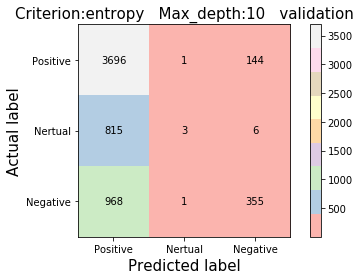

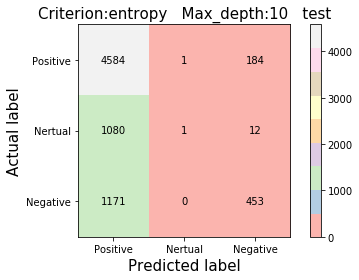

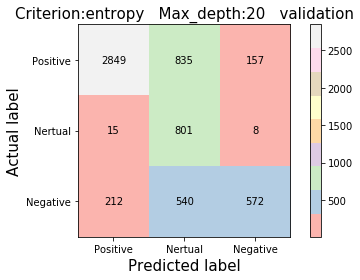

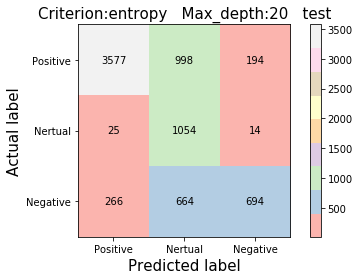

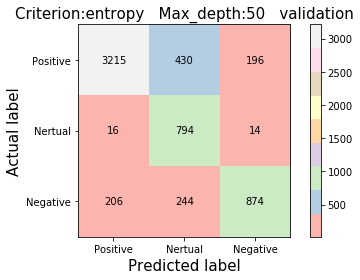

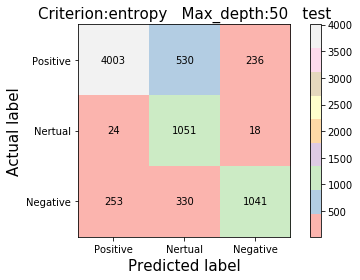

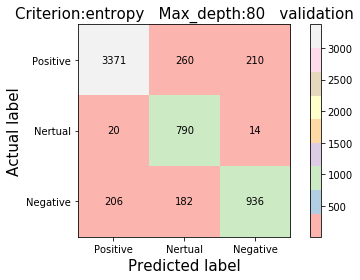

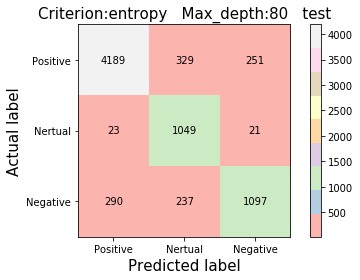

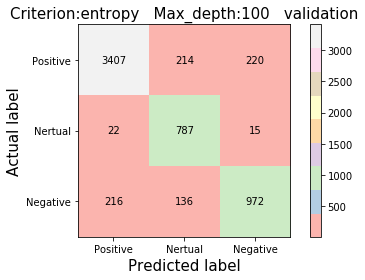

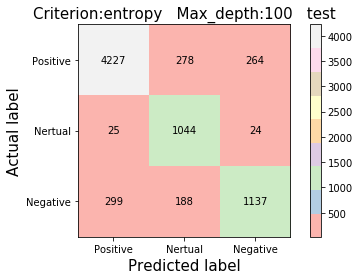

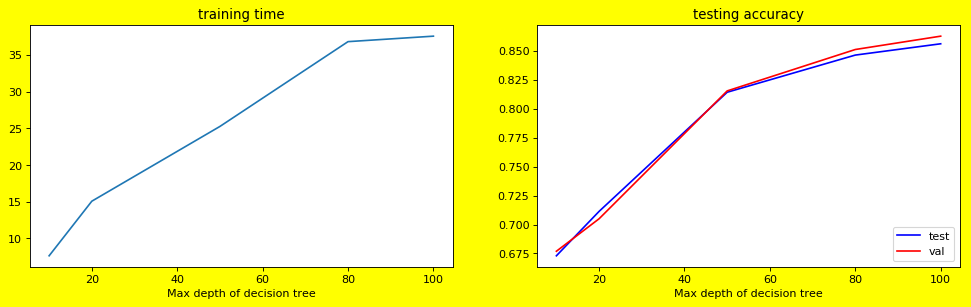

In [9]:
# Now I set different max_depth for the model and compare the result
depth_list = [10,20,50,80,100]
train_time_list = []
test_acc_list = []
val_acc_list = []

for i in range(len(depth_list)):
    decision_tree = decision_tree_classifier('entropy',depth_list[i])
    val_accuracy,time_cost = decision_tree.train(review_train,label_train)
    accuracy = decision_tree.test(review_test,label_test)
    
    val_acc_list.append(val_accuracy)
    train_time_list.append(time_cost)
    test_acc_list.append(accuracy)
    print()

plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='yellow')
plt.subplot(1,2,1)
plt.plot(depth_list,train_time_list)
plt.title("training time")
plt.xlabel("Max depth of decision tree")

plt.subplot(1,2,2)
l1, = plt.plot(depth_list,test_acc_list,color = 'b',label='test')
l2, = plt.plot(depth_list,val_acc_list,color = 'r',label='val')
plt.legend(handles=[l1, l2], labels=['test', 'val'],loc='lower right')
plt.title("testing accuracy")
plt.xlabel("Max depth of decision tree")

plt.show()

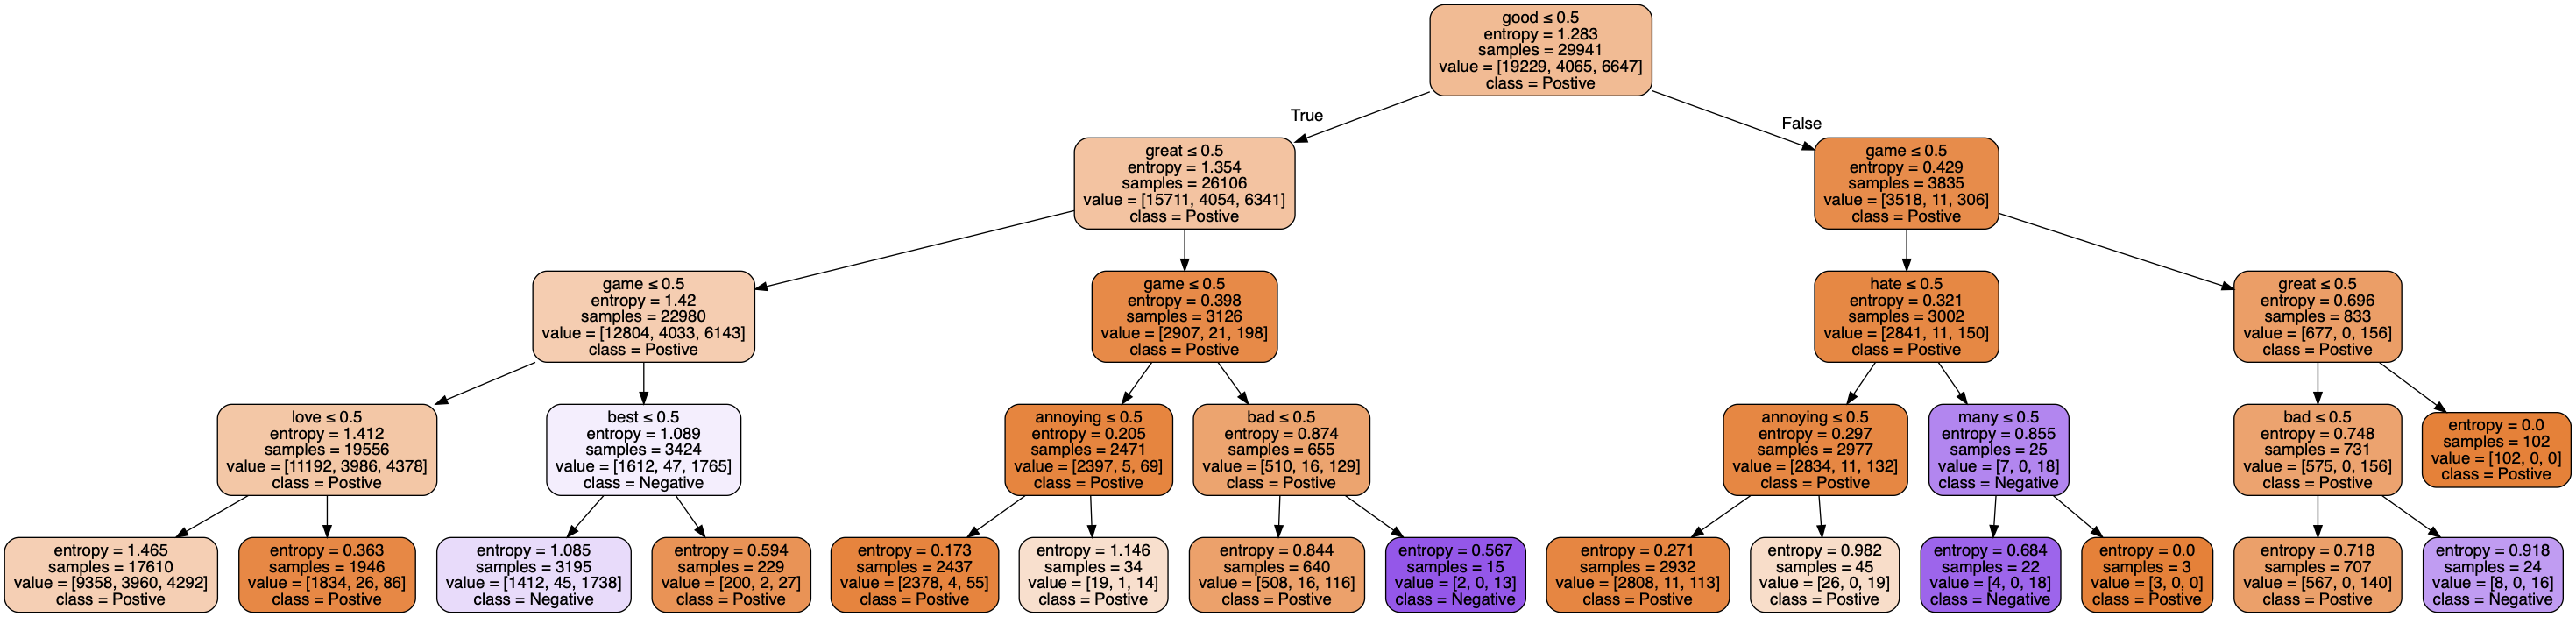

In [10]:
# a sample of visualization 
# need the library graphviz, which may not be installed in other computers
from IPython.display import Image  
import pydotplus

decision_tree_visual = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
decision_tree_visual.fit(review_train,label_train)
dot_data = tree.export_graphviz(decision_tree_visual, out_file=None, 
                         feature_names=features_list,  
                         class_names=["Postive","Nertual","Negative"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

##Method 2 : Random Forest

In [11]:
# Now i consider the second method: Decision tree with random forest
# the core idea of RandomForest is to compare and get the result from multiple decision trees
# it will definitly cost more time than a single tree, i want to see is the result significantly better than a single tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn import cross_validation, metrics


param_set= [{'n_estimators': [50], 'max_depth':[10]},
            {'n_estimators': [100], 'max_depth':[10]},
            {'n_estimators': [150], 'max_depth':[10]},
            {'n_estimators': [50], 'max_depth':[20]},
            {'n_estimators': [100], 'max_depth':[20]},
            {'n_estimators': [150], 'max_depth':[20]},
            {'n_estimators': [50], 'max_depth':[50]},
            {'n_estimators': [100], 'max_depth':[50]},
            {'n_estimators': [150], 'max_depth':[50]},
            {'n_estimators': [100], 'max_depth':[100]}]

random_forest = RandomForestClassifier(criterion = 'gini',n_jobs = 5)
gsearch1= GridSearchCV(random_forest,param_set,cv = 5)

gsearch1.fit(review_train,label_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=5,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [50], 'max_depth': [10]}, {'n_estimators': [100], 'max_depth': [10]}, {'n_estimators': [150], 'max_depth': [10]}, {'n_estimators': [50], 'max_depth': [20]}, {'n_estimators': [100], 'max_depth': [20]}, {'n_estimators': [150], 'max_depth': [20]}, {'n_estimators': [50], 'max_depth': [50]}, {'n_estimators': [100], 'max_depth': [50]}, {'n_estimators': [150], 'max_depth': [50]}, {'n_estimators': [100], 'max_depth': [100]}]

In [12]:
print("Grid scores on for parameters set:")
print()
means = gsearch1.cv_results_['mean_test_score']
#average = average + clf3.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()
print("Best parameters set found:")
print(gsearch1.best_params_)


Grid scores on for parameters set:

0.648 (+/-0.005) for {'max_depth': 10, 'n_estimators': 50}
0.646 (+/-0.002) for {'max_depth': 10, 'n_estimators': 100}
0.646 (+/-0.002) for {'max_depth': 10, 'n_estimators': 150}
0.691 (+/-0.012) for {'max_depth': 20, 'n_estimators': 50}
0.691 (+/-0.008) for {'max_depth': 20, 'n_estimators': 100}
0.691 (+/-0.007) for {'max_depth': 20, 'n_estimators': 150}
0.775 (+/-0.010) for {'max_depth': 50, 'n_estimators': 50}
0.776 (+/-0.008) for {'max_depth': 50, 'n_estimators': 100}
0.776 (+/-0.005) for {'max_depth': 50, 'n_estimators': 150}
0.887 (+/-0.005) for {'max_depth': 100, 'n_estimators': 100}

Best parameters set found:
{'max_depth': 100, 'n_estimators': 100}


Random forest training time with optimal parameters set found: 81.84
Random forest test accuracy with optimal parameters set found: 0.8966069997328346


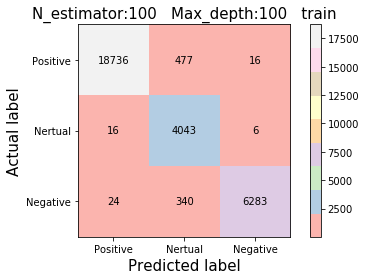

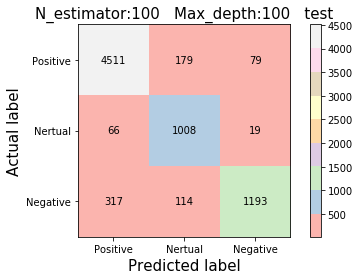

In [13]:
random_forest_1 = RandomForestClassifier(criterion = 'entropy',
                                         n_estimators=gsearch1.best_params_['n_estimators'],
                                         max_depth=gsearch1.best_params_['max_depth'])
start_time_1 = time.time()
random_forest_1.fit(review_train,label_train)
time_cost_1 = round(time.time()-start_time_1,3)
print("Random forest training time with optimal parameters set found: %s" %time_cost_1)

predict_1 = random_forest_1.predict(review_test)
n_corrects = 0
for i in range (len(label_test)):
    if predict_1[i] == label_test[i]:
        n_corrects +=1
accuracy = float(n_corrects)/len(label_test)
print("Random forest test accuracy with optimal parameters set found: %s" %accuracy)
 

    
    
# Confusion matrix
#train dataset
predict_train = random_forest_1.predict(review_train)
confusion_train = metrics.confusion_matrix(label_train, predict_train)
plt.figure()
plt.imshow(confusion_train, interpolation='nearest', cmap='Pastel1')
plt.title('N_estimator:%s   Max_depth:%s   %s' %(gsearch1.best_params_['n_estimators'],
                                                 gsearch1.best_params_['max_depth'],
                                                 "train"), size = 15)
plt.colorbar()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.tight_layout()
width, height = confusion_train.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion_train[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

#test dataset
confusion_test = metrics.confusion_matrix(label_test, predict_1)
plt.figure()
plt.imshow(confusion_test, interpolation='nearest', cmap='Pastel1')
plt.title('N_estimator:%s   Max_depth:%s   %s' %(gsearch1.best_params_['n_estimators'],
                                                 gsearch1.best_params_['max_depth'],
                                                 "test"), size = 15)
plt.colorbar()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.tight_layout()
width, height = confusion_test.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion_test[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [15]:
# Method 3 GBDT Classification
from sklearn.ensemble import GradientBoostingClassifier

'''
param_set_gbdt= [{'n_estimators': [20], 'max_depth':[20],'learning_rate':[0.1]},
                {'n_estimators': [30], 'max_depth':[20],'learning_rate':[0.1]},
                {'n_estimators': [40], 'max_depth':[20],'learning_rate':[0.1]},
                {'n_estimators': [20], 'max_depth':[50],'learning_rate':[0.1]},
                {'n_estimators': [30], 'max_depth':[50],'learning_rate':[0.1]},
                {'n_estimators': [40], 'max_depth':[50],'learning_rate':[0.1]},
                {'n_estimators': [20], 'max_depth':[20],'learning_rate':[0.05]},
                {'n_estimators': [30], 'max_depth':[20],'learning_rate':[0.05]},
                {'n_estimators': [40], 'max_depth':[20],'learning_rate':[0.05]},
                {'n_estimators': [20], 'max_depth':[50],'learning_rate':[0.05]},
                {'n_estimators': [30], 'max_depth':[50],'learning_rate':[0.05]},
                {'n_estimators': [40], 'max_depth':[50],'learning_rate':[0.05]}]
'''

# since i find that the gbdt cost lots of time, i decide to choose a much easier set
param_set_gbdt= [{'n_estimators': [10], 'max_depth':[5],'learning_rate':[0.1]},
                {'n_estimators': [20], 'max_depth':[5],'learning_rate':[0.1]},
                {'n_estimators': [10], 'max_depth':[10],'learning_rate':[0.1]},
                {'n_estimators': [20], 'max_depth':[10],'learning_rate':[0.1]}]
gbdt = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',
                                  random_state = 4211,max_features='sqrt',
                                  subsample=0.6 ,  min_samples_leaf=40,min_samples_split = 80)
gsearch2= GridSearchCV(gbdt,param_set_gbdt,cv = 5)

gsearch2.fit(review_train,label_train)

# max_features='sqrt'  subsample=0.8   min_samples_leaf=20 


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_sa...      subsample=0.6, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10], 'max_depth': [5], 'learning_rate': [0.1]}, {'n_estimators': [20], 'max_depth': [5], 'learning_rate': [0.1]}, {'n_estimators': [10], 'max_depth': [10], 'learning_rate': [0.1]}, {'n_estimators': [20], 'max_depth': [10], 'learning_rate': [0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gdbt_2 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',random_state = 4211,
                                    max_features = "auto",#n_jobs = 3,
                                    n_estimators= 3,
                                    max_depth= 10,
                                   learning_rate = 0.1)
gdbt_2.fit(review_train,label_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3,
              n_iter_no_change=None, presort='auto', random_state=4211,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [99]:
predict_try = gdbt_2.predict(review_test)
n_corrects = 0
for i in range (len(label_test)):
    if predict_try[i] == label_test[i]:
        n_corrects +=1
accuracy = float(n_corrects)/len(label_test)
print("GBDT with optimal parameters set found: %s" %accuracy)
 

GBDT with optimal parameters set found: 0.6843441090034732


In [16]:
print("Grid scores on for parameters set:")
print()
means = gsearch2.cv_results_['mean_test_score']
#average = average + clf3.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()
print("Best parameters set found:")
print(gsearch2.best_params_)


Grid scores on for parameters set:

0.643 (+/-0.002) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}
0.649 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}
0.654 (+/-0.011) for {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10}
0.678 (+/-0.018) for {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20}

Best parameters set found:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20}


GBDT training time with optimal parameters set found: 687.85
GBDT with optimal parameters set found: 0.734304034197168


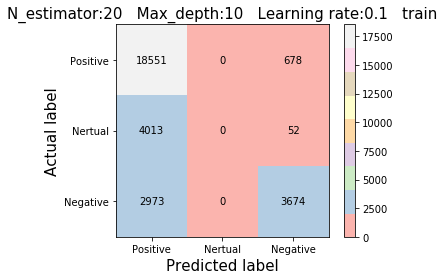

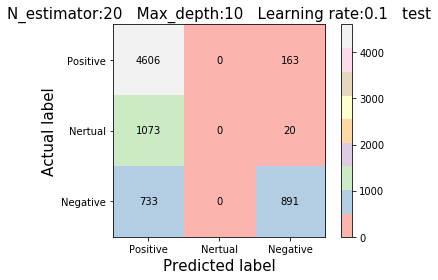

In [22]:
gdbt_1 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',random_state = 4211,
                                    n_estimators=gsearch2.best_params_['n_estimators'],
                                    max_depth=gsearch2.best_params_['max_depth'],
                                   learning_rate = gsearch2.best_params_['learning_rate'],
                                   subsample=0.6 ,  min_samples_leaf=40,min_samples_split = 80 )
start_time_2 = time.time()
gdbt_1.fit(review_train,label_train)
time_cost_2 = round(time.time()-start_time_2,3)
print("GBDT training time with optimal parameters set found: %s" %time_cost_2)

predict_2 = gdbt_1.predict(review_test)
n_corrects = 0
for i in range (len(label_test)):
    if predict_2[i] == label_test[i]:
        n_corrects +=1
accuracy = float(n_corrects)/len(label_test)
print("GBDT with optimal parameters set found: %s" %accuracy)
 

    
    
# Confusion matrix
#train dataset
predict_train = gdbt_1.predict(review_train)
confusion_train = metrics.confusion_matrix(label_train, predict_train)
plt.figure()
plt.imshow(confusion_train, interpolation='nearest', cmap='Pastel1')
plt.title('N_estimator:%s   Max_depth:%s   Learning rate:%s   %s' %(gsearch2.best_params_['n_estimators'],
                                                                    gsearch2.best_params_['max_depth'],
                                                                    gsearch2.best_params_['learning_rate'],
                                                                    "train"), size = 15)
plt.colorbar()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.tight_layout()
width, height = confusion_train.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion_train[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

#test dataset
#predict_train = gdbt_1.predict(review_train)
confusion_test = metrics.confusion_matrix(label_test, predict_2)
plt.figure()
plt.imshow(confusion_test, interpolation='nearest', cmap='Pastel1')
plt.title('N_estimator:%s   Max_depth:%s   Learning rate:%s   %s' %(gsearch2.best_params_['n_estimators'],
                                                                    gsearch2.best_params_['max_depth'],
                                                                    gsearch2.best_params_['learning_rate'],
                                                                    "test"), size = 15)
plt.colorbar()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.tight_layout()
width, height = confusion_test.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion_test[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')